# Data Viz for Distill Before Veirfy Experiment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import seaborn as sns

## Depth Experiment with Val Loss

In [2]:
experiment = "output/exp_alpine_depth_val_10_17_2022"
results = pd.read_csv(f"./{experiment}/results.csv")
results_teacher = pd.read_csv(f"./{experiment}/results.teacher.csv")

In [3]:
results.melt(id_vars="num_hidden_layers", value_vars=("val_mean_squared_error", "mean_squared_error"))

,num_hidden_layers,variable,value
0,2,val_mean_squared_error,0.018916
1,2,val_mean_squared_error,0.019147
2,2,val_mean_squared_error,0.018155
3,2,val_mean_squared_error,0.019997
4,2,val_mean_squared_error,0.020190
...,...,...,...
415,8,mean_squared_error,0.008144
416,8,mean_squared_error,0.012913
417,8,mean_squared_error,0.011584
418,8,mean_squared_error,0.010173


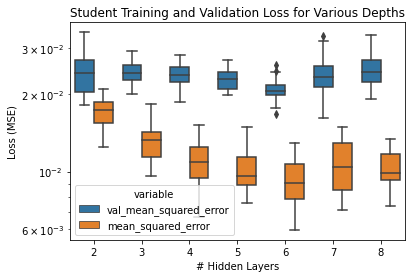

In [4]:
sns.boxplot(
    data=results.melt(
        id_vars="num_hidden_layers",
        value_vars=("val_mean_squared_error", "mean_squared_error")),
    x="num_hidden_layers",
    y="value",
    hue="variable")
    #err_style="bars")
plt.yscale("log")
plt.xlabel("# Hidden Layers")
plt.ylabel("Loss (MSE)")
plt.title("Student Training and Validation Loss for Various Depths")
plt.savefig("viz_10_17_2022/loss_for_depth.pdf")

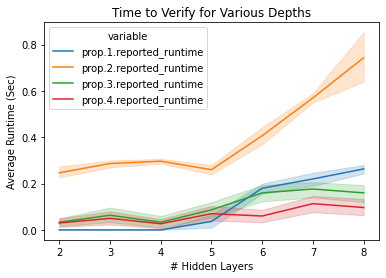

In [5]:
columns = [f'prop.{p}.reported_runtime' for p in [1,2,3,4]]
filtered_results = results.melt(
        id_vars="num_hidden_layers",
        value_vars=columns)
filtered_results["value"] = filtered_results["value"].where(filtered_results["value"] != -1, 0)

sns.lineplot(
    data=filtered_results,
    x="num_hidden_layers",
    y="value",
    hue="variable")
    #err_style="bars")
plt.ylabel("Average Runtime (Sec)")
plt.xlabel("# Hidden Layers")
plt.title("Time to Verify for Various Depths")
plt.savefig("viz_10_17_2022/time_for_depth.pdf")

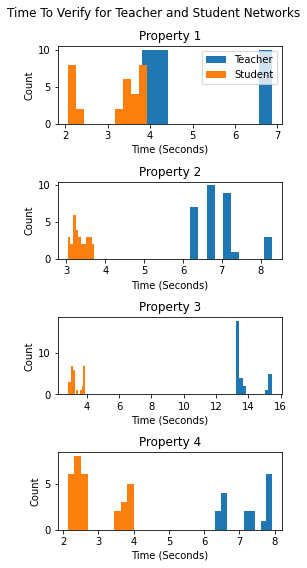

In [6]:
plt.figure(figsize=(4,8))
for p in [1,2,3,4]:
    plt.subplot(4,1,p)
    plt.hist(results_teacher[(results_teacher[f"prop.{p}.result"]!="error")][f"prop.{p}.python_time"], label="Teacher")
    plt.hist(results[(results["num_hidden_layers"]==5) & (results[f"prop.{p}.result"]!="error")][f"prop.{p}.python_time"], label="Student")
    if p==1:
        plt.legend()
    plt.title(f"Property {p}")
    plt.xlabel("Time (Seconds)")
    plt.ylabel("Count")

plt.suptitle("Time To Verify for Teacher and Student Networks")
plt.tight_layout()
plt.savefig("viz_10_17_2022/time_depth5_detail.pdf")

Property 1
Teacher Network
holds    30
Name: prop.1.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.1.result, dtype: float64
Teacher Miss Rate for Property 1 = 0.0
Property 1
Student Network
holds    210
Name: prop.1.result, dtype: int64
Property 2
Teacher Network
holds    30
Name: prop.2.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.2.result, dtype: float64
Teacher Miss Rate for Property 2 = 0.0
Property 2
Student Network
holds       140
violated     70
Name: prop.2.result, dtype: int64
Property 3
Teacher Network
holds    30
Name: prop.3.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.3.result, dtype: float64
Teacher Miss Rate for Property 3 = 0.0
Property 3
Student Network
holds       182
violated     28
Name: prop.3.result, dtype: int64
Property 4
Teacher Network
holds    17
error    13
Name: prop.4.result, dtype: int64
holds       17.0
violated     0.0
error       13.0
Name: p

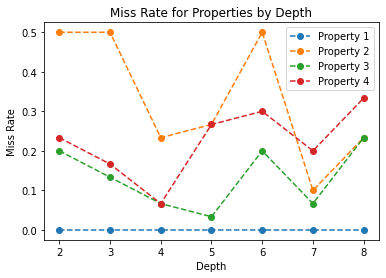

In [8]:
# results, results_teacher
# all properties should be satisfied
# Miss rate:

for property in [1,2,3,4]:
    print(f"Property {property}")
    print("Teacher Network")
    print(results_teacher[f'prop.{property}.result'].value_counts())

    count_results = results_teacher[f'prop.{property}.result'].value_counts()
    count_results = count_results.reindex(["holds", "violated", "error"]).fillna(0)
    print(count_results)
    teacher_miss_rate = count_results["violated"] / (count_results["violated"] + count_results["holds"])
    print(f"Teacher Miss Rate for Property {property} = {teacher_miss_rate}")

    print(f"Property {property}")
    print("Student Network")
    print(results[f'prop.{property}.result'].value_counts())

    count_results = results.groupby("num_hidden_layers")[f'prop.{property}.result'].value_counts()
    count_results = count_results.unstack().reindex(["holds", "violated", "error"], axis=1).fillna(0)
    student_miss_rate = count_results["violated"]/(count_results["violated"]+count_results["holds"])

    plt.plot(student_miss_rate, label=f"Property {property}", marker="o", linestyle="--")

plt.legend()
plt.ylabel("Miss Rate")
plt.xlabel("Depth")
plt.title("Miss Rate for Properties by Depth")
plt.savefig("viz_10_17_2022/miss_rate_depth.pdf")
plt.show()




## ndata experiment

In [9]:
experiment = "output/exp_alpine_ndata_val_10_17_2022"
ndata_results = pd.read_csv(f"./{experiment}/results.csv")
ndata_results_teacher = pd.read_csv(f"./{experiment}/results.teacher.csv")

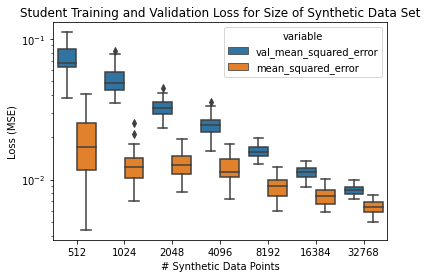

In [10]:
sns.boxplot(
    data=ndata_results.melt(
        id_vars="n_synthetic_data_points",
        value_vars=("val_mean_squared_error", "mean_squared_error")),
    x="n_synthetic_data_points",
    y="value",
    hue="variable")
    #err_style="bars")
plt.yscale("log")
plt.xlabel("# Synthetic Data Points")
plt.ylabel("Loss (MSE)")
plt.title("Student Training and Validation Loss for Size of Synthetic Data Set")
plt.savefig("viz_10_17_2022/loss_for_ndata.pdf")

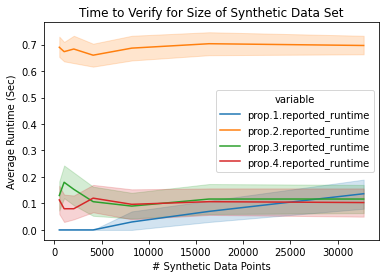

In [11]:
columns = [f'prop.{p}.reported_runtime' for p in [1,2,3,4]]
filtered_results = ndata_results.melt(
        id_vars="n_synthetic_data_points",
        value_vars=columns)
filtered_results["value"] = filtered_results["value"].where(filtered_results["value"] != -1, 0)

sns.lineplot(
    data=filtered_results,
    x="n_synthetic_data_points",
    y="value",
    hue="variable")
    #err_style="bars")
plt.ylabel("Average Runtime (Sec)")
plt.xlabel("# Synthetic Data Points")
plt.title("Time to Verify for Size of Synthetic Data Set")
plt.savefig("viz_10_17_2022/time_for_ndata.pdf")

Property 1
Teacher Network
holds    30
Name: prop.1.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.1.result, dtype: float64
Teacher Miss Rate for Property 1 = 0.0
Property 1
Student Network
holds    210
Name: prop.1.result, dtype: int64
Property 2
Teacher Network
holds    30
Name: prop.2.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.2.result, dtype: float64
Teacher Miss Rate for Property 2 = 0.0
Property 2
Student Network
holds       136
violated     74
Name: prop.2.result, dtype: int64
Property 3
Teacher Network
holds    30
Name: prop.3.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.3.result, dtype: float64
Teacher Miss Rate for Property 3 = 0.0
Property 3
Student Network
holds       176
violated     34
Name: prop.3.result, dtype: int64
Property 4
Teacher Network
holds    30
Name: prop.4.result, dtype: int64
holds       30.0
violated     0.0
error        0.0
Name: prop.4.result

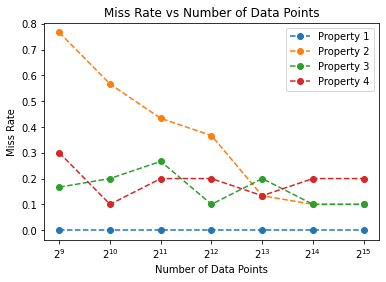

In [13]:
# results, results_teacher
# all properties should be satisfied
# Miss rate:

for property in [1,2,3,4]:
    print(f"Property {property}")
    print("Teacher Network")
    print(ndata_results_teacher[f'prop.{property}.result'].value_counts())

    count_results = ndata_results_teacher[f'prop.{property}.result'].value_counts()
    count_results = count_results.reindex(["holds", "violated", "error"]).fillna(0)
    print(count_results)
    teacher_miss_rate = count_results["violated"] / (count_results["violated"] + count_results["holds"])
    print(f"Teacher Miss Rate for Property {property} = {teacher_miss_rate}")

    print(f"Property {property}")
    print("Student Network")
    print(ndata_results[f'prop.{property}.result'].value_counts())

    count_results = ndata_results.groupby("n_synthetic_data_points")[f'prop.{property}.result'].value_counts()
    count_results = count_results.unstack().reindex(["holds", "violated", "error"], axis=1).fillna(0)
    student_miss_rate = count_results["violated"]/(count_results["violated"]+count_results["holds"])

    plt.plot(student_miss_rate, label=f"Property {property}", marker="o", linestyle="--")

plt.legend()
plt.ylabel("Miss Rate")
plt.xlabel("Number of Data Points")
plt.gca().set_xscale("log", base=2)
# plt.gca().set_yscale("log")
plt.title("Miss Rate vs Number of Data Points")
plt.savefig("viz_10_17_2022/miss_rate_ndata.pdf")
plt.show()


